In [70]:
function I_sin(t, tau, I0)
    if t<0 || t>2*tau
        return 0
    end
    return I0*(sin(pi*t/(2*tau))).^2
end

I_sin (generic function with 1 method)

In [208]:
I0=1.2e6/2 #amps
tau=240e-9 #seconds
t=255e-9 #seconds
A=12 #atomic mass units
Z=4 #effective ion charge
V=40e3 #in m/s
R0=8e-3 #radius of array
lamb=1053e-9#laser probing wavelength for Faraday, metres.

mu_0=4e-7*pi
m_p=1.67e-27

xs=linspace(-30e-3,30e-3,500)# in metres, form is (minimum, maximum, number of points)
ys=linspace(10e-3,30e-3,500)# in metres, form is (minimum, maximum, number of points)
ys=ys'
dx=xs[2]-xs[1] 
dy=ys[2]-ys[1]
R=sqrt(xs.^2.+ys.^2) #distance from centre of array to each point, m
ret_time=t-(R-R0)./V#retarded time taken to reach each point, seconds
I_ret=[I_sin(t, tau, I0) for t in ret_time]
I_ret=reshape(I_ret, 500, 500)
ne=I_ret.^2.*(mu_0*Z)./(8*pi^2*V^2*R0*R*A*m_p) #electron density, m^-3
B=mu_0/(2*pi*R0).*I_ret#magnetic field magnitude, T
th=atan(xs./ys)#angle between x axis and line from the radius
Bx=B.*ys./sqrt(xs.^2.+ ys.^2)

neL=1e-4*sum(ne, 1)*dx #line average electron density cm^-2
alpha=2.62e-13*lamb^2*sum(Bx.*ne, 1)*dx #rotation angle, radians
Bmax=Bx[size(ys)[2]/2,:] #peak magnetic field along any radial direction - this is what we are trying to extract
Bavg=3.4e20*alpha./neL #x component of magnetic field inferred by current analysis techniques.

1x500 Array{Float64,2}:
 11.5772  11.5418  11.5054  11.4682  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN

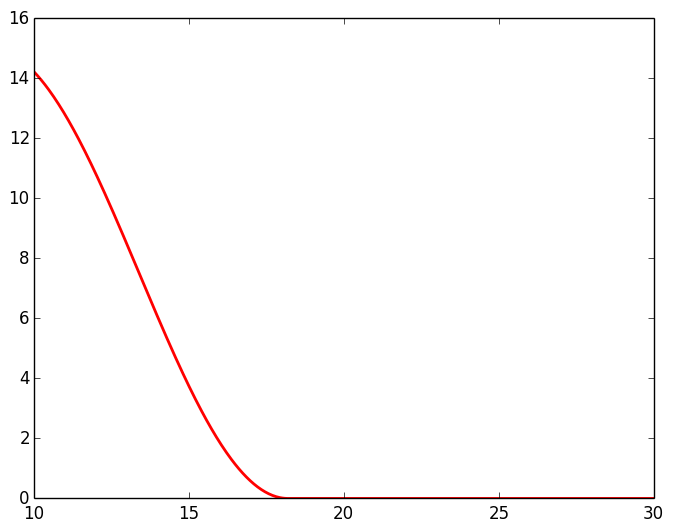

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x11cc9ce50>

In [209]:
using PyPlot
plot(1e3*ys', Bmax', color="red", linewidth=2.0)

In [205]:
maximum(Bx[size(ys)[2]/2,:])

10.369528547734218

In [2]:
using Gadfly 
plot(x=rand(10), y=rand(10), Geom.point, Geom.line)

LoadError: plot not defined
while loading In[2], in expression starting on line 2

In [1]:
using Gadfly

LoadError: LOAD_CACHE_PATH not defined
while loading /Users/jdhare/.julia/v0.3/Compose/src/Compose.jl, in expression starting on line 148
while loading /Users/jdhare/.julia/v0.3/Gadfly/src/Gadfly.jl, in expression starting on line 9
while loading In[1], in expression starting on line 1

In [3]:
Gadfly.plot(x=rand(10), y=rand(10), Geom.point, Geom.line)

LoadError: plot not defined
while loading In[3], in expression starting on line 1

eval (generic function with 2 methods)